In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (15,10)

%matplotlib inline

In [2]:
os.listdir('.')

['output_15_3.png',
 'sensitivity_plot.ipynb',
 'exclusion_version',
 'output_21_1.png',
 'notebook.tex',
 'changing_kaut',
 'wide_params',
 '.ipynb_checkpoints',
 'output_21_2.png',
 'output_15_1.png',
 'dsim.info',
 'output_8_0.png',
 'Figures',
 'model_io',
 'sensitivities.txt',
 'output_28_1.png',
 'output_28_2.png',
 'results.txt',
 'output_21_0.png',
 'output_21_3.png',
 'output_8_2.png',
 'output_8_3.png',
 'output_28_3.png',
 'output_15_2.png',
 'output_15_0.png',
 'output_28_0.png',
 'exc_kaut',
 'output_8_1.png']

## Sensitivities with variable k_aut with healthy data

In [3]:
df = pd.read_csv('wide_params/healthy/euclidean/sensitivities.txt', sep='\t')

In [4]:
df.sort_values(by="CCO_mu_star", ascending=False)

,Parameter,CCO_mu,CCO_mu_star,CCO_sigma,CCO_mu_star_conf,TOI_mu,TOI_mu_star,TOI_sigma,TOI_mu_star_conf,CBF_mu,CBF_mu_star,CBF_sigma,CBF_mu_star_conf,Vmca_mu,Vmca_mu_star,Vmca_sigma,Vmca_mu_star_conf
111,Vol_mit,38.760307,149.317667,182.960561,22.130713,-7.270059e+04,7.323390e+04,7.119771e+05,1.373299e+05,-7.014835e-01,9.167096e-01,6.669402e+00,1.288196e+00,-3.507417e+03,4.583548e+03,3.334701e+04,6.471274e+03
1,a_n,57.555124,146.693728,161.217002,17.527391,7.141833e-07,7.141833e-07,7.141833e-06,1.372875e-06,-1.583722e-11,1.583722e-11,1.583722e-10,3.077513e-11,-7.918611e-08,7.918611e-08,7.918611e-07,1.489309e-07
91,r_t,-31.614055,138.034168,296.828624,53.112976,6.873430e+05,6.903478e+05,5.991054e+06,1.155968e+06,2.584206e+00,4.103427e+00,1.798609e+01,3.589283e+00,1.292103e+04,2.051713e+04,8.993045e+04,1.763560e+04
83,r_0,-70.930617,136.420112,258.257860,45.694653,8.138146e+06,8.144671e+06,8.126421e+07,1.599795e+07,4.514234e+00,5.671599e+00,2.355186e+01,4.573246e+00,2.257117e+04,2.835800e+04,1.177593e+05,2.233106e+04
89,r_m,6.721607,105.765765,234.472922,40.329672,-6.038540e+06,6.054165e+06,6.035854e+07,1.200041e+07,4.419643e+00,5.374388e+00,3.471992e+01,6.789486e+00,2.209821e+04,2.687194e+04,1.735996e+05,3.281204e+04
109,v_pn,-62.565008,103.117210,229.291800,41.106303,3.132559e+08,3.132604e+08,3.132562e+09,6.080036e+08,2.575043e+00,3.230555e+00,1.941171e+01,3.704067e+00,1.287521e+04,1.615278e+04,9.705857e+04,1.812322e+04
15,cytox_tot_tis,32.917537,95.568298,159.817690,26.339354,-2.070641e+07,2.072325e+07,2.071306e+08,4.051456e+07,-8.203000e-02,1.520962e-01,7.998699e-01,1.540462e-01,-4.101500e+02,7.604810e+02,3.999350e+03,7.537026e+02
115,Xtot,4.309578,90.619420,202.417914,35.078127,2.287311e+04,3.243359e+04,2.184537e+05,4.262574e+04,-1.222205e+00,5.296115e+00,3.232077e+01,6.198937e+00,-6.111023e+03,2.648058e+04,1.616039e+05,3.104085e+04
107,v_cn,41.908861,74.210864,207.560807,37.726540,-8.604547e+00,2.950638e+03,9.635599e+03,1.743171e+03,-3.530853e+00,4.092421e+00,2.655711e+01,5.114547e+00,-1.765427e+04,2.046210e+04,1.327855e+05,2.506908e+04
20,Dp_n,4.816603,67.057556,175.197351,31.268964,-2.137612e+03,2.812109e+03,1.841477e+04,3.634827e+03,-2.616289e+05,2.616291e+05,2.616286e+06,5.218282e+05,-1.308145e+09,1.308146e+09,1.308143e+10,2.580128e+09


In [5]:
df.shape

(121, 17)

In [6]:
df.columns

Index(['Parameter', 'CCO_mu', 'CCO_mu_star', 'CCO_sigma', 'CCO_mu_star_conf',
       'TOI_mu', 'TOI_mu_star', 'TOI_sigma', 'TOI_mu_star_conf', 'CBF_mu',
       'CBF_mu_star', 'CBF_sigma', 'CBF_mu_star_conf', 'Vmca_mu',
       'Vmca_mu_star', 'Vmca_sigma', 'Vmca_mu_star_conf'],
      dtype='object')

In [7]:
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2']):#,"k_aut"]):    
    df = df.query("Parameter!='{}'".format(p))
df.shape

(121, 17)

In [8]:
def sensitivity(df, output):
    param = output+"_mu_star"
    min_max_scaler = preprocessing.MinMaxScaler()
    x = df[param].values.astype(float).reshape(-1, 1)
    # x = np.log(x+1)
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame({"Parameter": df["Parameter"].values, param: x_scaled.flatten()})
    df_norm = df_norm.sort_values(by=param, ascending=False)
    ax = sns.barplot(x=param, y="Parameter", data=df_norm[df_norm[param]>0.5])
    #ax = sns.barplot(x=param, y="Parameter", data=df_norm.head(10))
    ax.set_title(output)
    plt.tight_layout()
    plt.savefig('Figures/wide_params/euclidean/healthy/{}.png'.format(param))
    plt.show()
    plt.close()
    sensitive_parameters = df_norm[df_norm[param]>0.5]["Parameter"].values
    
    return ax, df_norm, sensitive_parameters

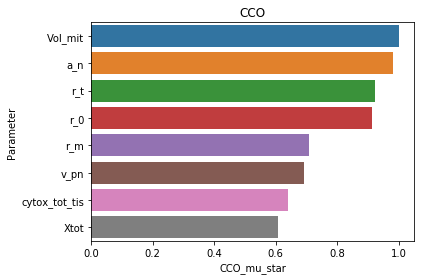

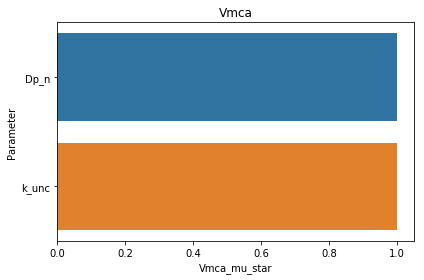

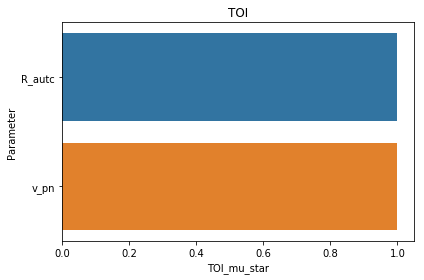

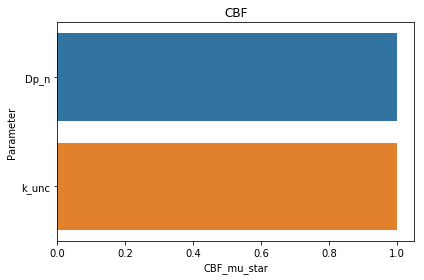

In [9]:
sens_params_euclidean = []
for o in ["CCO", "Vmca", "TOI", "CBF"]:
    ax, df_norm, sens_p = sensitivity(df, o)
    sens_params_euclidean.extend(list(sens_p))


## Sensitivities with variable k_aut with impaired data

In [10]:
df = pd.read_csv('wide_params/impaired/euclidean/sensitivities.txt', sep='\t')

In [11]:
df.shape

(121, 17)

In [12]:
df.columns

Index(['Parameter', 'CCO_mu', 'CCO_mu_star', 'CCO_sigma', 'CCO_mu_star_conf',
       'TOI_mu', 'TOI_mu_star', 'TOI_sigma', 'TOI_mu_star_conf', 'CBF_mu',
       'CBF_mu_star', 'CBF_sigma', 'CBF_mu_star_conf', 'Vmca_mu',
       'Vmca_mu_star', 'Vmca_sigma', 'Vmca_mu_star_conf'],
      dtype='object')

In [13]:
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2']):#,"k_aut"]):    
    df = df.query("Parameter!='{}'".format(p))
df.shape

(121, 17)

In [14]:
def sensitivity(df, output):
    param = output+"_mu_star"
    min_max_scaler = preprocessing.MinMaxScaler()
    x = df[param].values.astype(float).reshape(-1, 1)
    # x = np.log(x+1)
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame({"Parameter": df["Parameter"].values, param: x_scaled.flatten()})
    df_norm = df_norm.sort_values(by=param, ascending=False)
    ax = sns.barplot(x=param, y="Parameter", data=df_norm[df_norm[param]>0.5])
    #ax = sns.barplot(x=param, y="Parameter", data=df_norm.head(10))
    ax.set_title(output)
    plt.tight_layout()
    plt.savefig('Figures/wide_params/euclidean/impaired/{}.png'.format(param))
    plt.show()
    plt.close()
    sensitive_parameters = df_norm[df_norm[param]>0.5]["Parameter"].values
    return ax, df_norm, sensitive_parameters

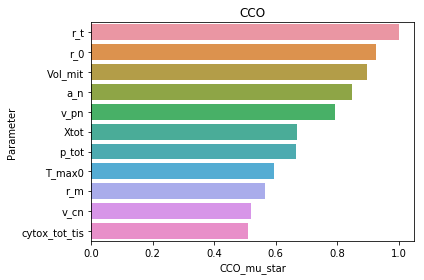

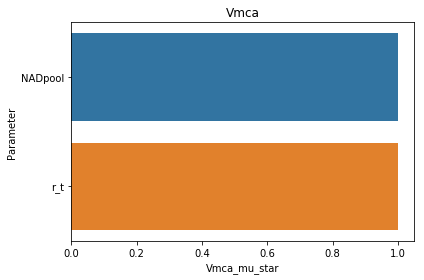

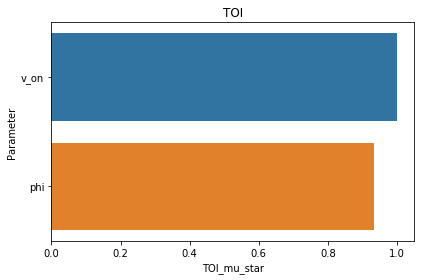

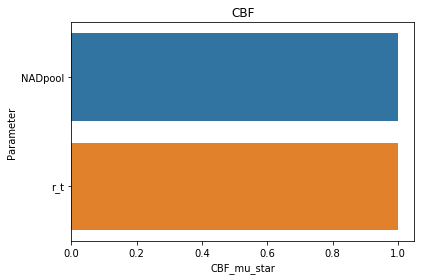

In [15]:
for o in ["CCO", "Vmca", "TOI", "CBF"]:
    ax, df_norm, sens_p = sensitivity(df, o)
    sens_params_euclidean.extend(list(sens_p))


## Sensitivities for constant k_aut

In [16]:
df = pd.read_csv('exc_kaut/k_Aut_1/sensitivities.txt', sep='\t')

In [17]:
df.columns

Index(['Parameter', 'CCO_mu', 'CCO_mu_star', 'CCO_sigma', 'CCO_mu_star_conf',
       'TOI_mu', 'TOI_mu_star', 'TOI_sigma', 'TOI_mu_star_conf', 'CBF_mu',
       'CBF_mu_star', 'CBF_sigma', 'CBF_mu_star_conf', 'Vmca_mu',
       'Vmca_mu_star', 'Vmca_sigma', 'Vmca_mu_star_conf'],
      dtype='object')

In [18]:
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2',"k_aut"]):    
    df = df.query("Parameter!='{}'".format(p))
df.shape

(120, 17)

In [19]:
def sensitivity(df, output):
    param = output+"_mu_star"
    min_max_scaler = preprocessing.MinMaxScaler()
    x = df[param].values.astype(float).reshape(-1, 1)
    # x = np.log(x+1)
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame({"Parameter": df["Parameter"].values, param: x_scaled.flatten()})
    df_norm = df_norm.sort_values(by=param, ascending=False)
    ax = sns.barplot(x=param, y="Parameter", data=df_norm[df_norm[param]>0.5])
    ax.set_title(output)
    plt.tight_layout()
    plt.savefig('Figures/kaut_1_0/{}.png'.format(param))
    plt.show()
    plt.close()
    return ax, df_norm

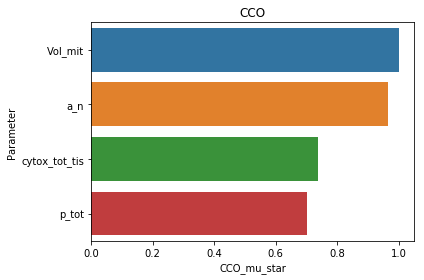

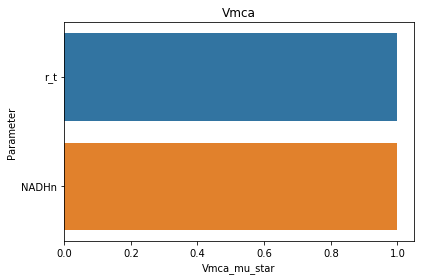

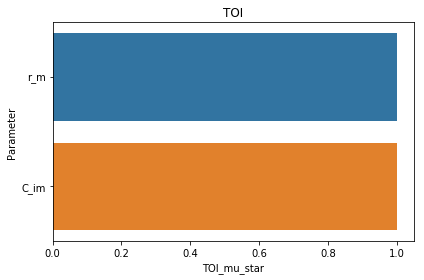

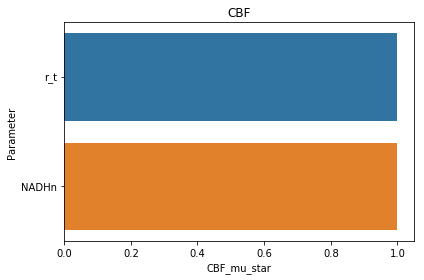

In [20]:
normed_dfs = {}
for o in ["CCO", "Vmca", "TOI", "CBF"]:
    ax, df_norm = sensitivity(df, o)
    normed_dfs[o]=df_norm

## k_Aut fixed in range around 0.7

In [21]:
df = pd.read_csv('exc_kaut/k_Aut_0_7/sensitivities.txt', sep='\t')

In [22]:
df.sort_values(by="CCO_mu_star", ascending=False)

,Parameter,CCO_mu,CCO_mu_star,CCO_sigma,CCO_mu_star_conf,TOI_mu,TOI_mu_star,TOI_sigma,TOI_mu_star_conf,CBF_mu,CBF_mu_star,CBF_sigma,CBF_mu_star_conf,Vmca_mu,Vmca_mu_star,Vmca_sigma,Vmca_mu_star_conf
2,a_n,23.534467,104.657099,109.759162,7.328488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
111,Vol_mit,25.424437,103.172239,110.647691,8.884944,-460.801967,460.807989,1757.224781,344.130203,-21.336514,21.372655,205.971983,41.946353,-1.066826e+05,1.068633e+05,1.029860e+06,2.023880e+05
16,cytox_tot_tis,25.468882,82.510037,113.357778,16.129282,12852.398996,15363.712771,86092.630021,17332.775227,0.120675,0.300551,1.522081,0.286463,6.033753e+02,1.502756e+03,7.610406e+03,1.411822e+03
91,r_t,-55.412820,77.829196,120.274741,20.717194,12081.729151,18716.936907,83050.918625,15895.346355,-445.862531,505.455550,4758.684374,907.693096,-2.229313e+06,2.527278e+06,2.379342e+07,4.579828e+06
74,p_tot,-10.985767,75.186689,132.411209,21.451378,-16624.938562,18098.899922,172269.433270,33365.398702,-28.164362,28.220448,280.854732,51.538914,-1.408218e+05,1.411022e+05,1.404274e+06,2.541111e+05
83,r_0,-16.303321,38.094559,88.328824,15.991410,19918.081926,46200.472660,223629.916663,43459.015482,1.367598,3.296348,16.494767,3.129898,6.837990e+03,1.648174e+04,8.247384e+04,1.619685e+04
89,r_m,-6.009196,37.095231,87.520636,15.489419,-12701.358668,37912.124201,190439.925891,38320.725467,1.773294,2.318210,14.466876,2.848801,8.866472e+03,1.159105e+04,7.233438e+04,1.399943e+04
21,Dp_n,15.486550,36.903906,55.389988,8.383467,4787.563552,4909.462481,44568.801101,8580.177470,0.058973,0.078620,0.479306,0.093787,2.948634e+02,3.931005e+02,2.396531e+03,4.605238e+02
62,NADHn,-15.728792,35.177536,48.593685,7.153215,105.304854,105.668784,130.747759,26.077800,-0.007215,0.007215,0.013789,0.002584,-3.607689e+01,3.607689e+01,6.894438e+01,1.347184e+01
65,NADpool,20.168260,32.837719,42.333602,6.554903,-766.559585,1133.690818,8944.525594,1764.060964,0.043177,0.044713,0.372998,0.073340,2.158857e+02,2.235659e+02,1.864991e+03,3.583435e+02


In [23]:
df.columns

Index(['Parameter', 'CCO_mu', 'CCO_mu_star', 'CCO_sigma', 'CCO_mu_star_conf',
       'TOI_mu', 'TOI_mu_star', 'TOI_sigma', 'TOI_mu_star_conf', 'CBF_mu',
       'CBF_mu_star', 'CBF_sigma', 'CBF_mu_star_conf', 'Vmca_mu',
       'Vmca_mu_star', 'Vmca_sigma', 'Vmca_mu_star_conf'],
      dtype='object')

In [24]:
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2',"k_aut"]):    
    df = df.query("Parameter!='{}'".format(p))
df.shape

(120, 17)

In [25]:
def sensitivity(df, output):
    param = output+"_mu_star"
    min_max_scaler = preprocessing.MinMaxScaler()
    x = df[param].values.astype(float).reshape(-1, 1)
    #x = np.log(x+1)
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame({"Parameter": df["Parameter"].values, param: x_scaled.flatten()})
    df_norm = df_norm.sort_values(by=param, ascending=False)
    ax = sns.barplot(x=param, y="Parameter", data=df_norm[df_norm[param]>0.5])
    ax.set_title(output)
    plt.tight_layout()
    plt.savefig('Figures/kaut_0_7/{}.png'.format(param))
    plt.show()
    plt.close()
    return ax, df_norm

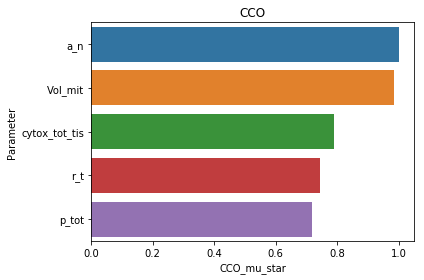

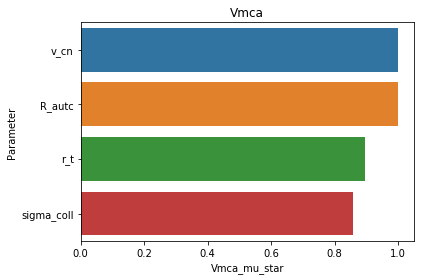

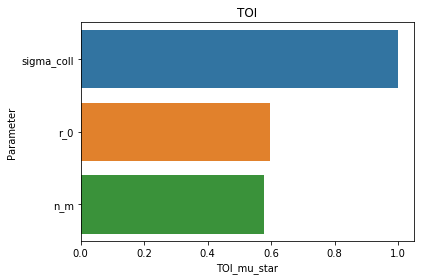

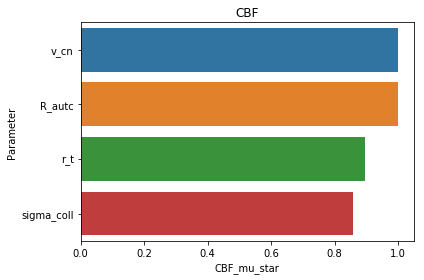

In [26]:
normed_dfs = {}

for o in ["CCO", "Vmca", "TOI", "CBF"]:
    ax, df_norm = sensitivity(df, o)
    normed_dfs[o]=df_norm

# NRMSE Sensitivities
## Healthy

In [42]:
df = pd.read_csv('wide_params/healthy/sensitivities.txt', sep='\t')

In [43]:
df.sort_values(by="CCO_mu_star", ascending=False)

,Parameter,CCO_mu,CCO_mu_star,CCO_sigma,CCO_mu_star_conf,TOI_mu,TOI_mu_star,TOI_sigma,TOI_mu_star_conf,CBF_mu,CBF_mu_star,CBF_sigma,CBF_mu_star_conf,Vmca_mu,Vmca_mu_star,Vmca_sigma,Vmca_mu_star_conf
91,r_t,40.139732,191.539881,363.397826,59.043184,-9.713001e+03,1.068937e+04,6.840412e+04,1.344346e+04,3.351940e+08,3.351941e+08,3.351938e+09,6.266680e+08,3.351940e+08,3.351941e+08,3.351938e+09,6.305852e+08
89,r_m,-7.764063,169.444173,381.375895,66.688641,1.014127e+03,2.350266e+03,1.225922e+04,2.279642e+03,7.345800e+02,8.753355e+02,7.745139e+03,1.487980e+03,7.345800e+02,8.753355e+02,7.745139e+03,1.465045e+03
1,a_n,40.541200,151.566765,182.986721,20.564801,1.628111e-08,1.628111e-08,1.628111e-07,3.139383e-08,-5.340791e-11,5.340791e-11,5.340791e-10,1.064953e-10,-5.340799e-11,5.340799e-11,5.340799e-10,1.033520e-10
111,Vol_mit,59.453521,146.573527,205.089723,30.565075,4.306042e+01,5.271908e+01,2.627423e+02,5.162336e+01,8.782436e+01,4.180258e+02,2.811965e+03,5.482897e+02,8.782436e+01,4.180258e+02,2.811965e+03,5.347750e+02
100,T_max0,64.705803,118.527433,334.841638,64.946686,1.923534e+01,5.279754e+01,1.697360e+02,3.119942e+01,-1.820774e+02,2.397198e+02,1.866508e+03,3.683206e+02,-1.820774e+02,2.397198e+02,1.866508e+03,3.765167e+02
109,v_pn,-26.096262,112.386724,327.290683,63.049775,1.342424e+03,1.374689e+03,1.289739e+04,2.595267e+03,5.066717e+02,1.114588e+03,7.376231e+03,1.407497e+03,5.066717e+02,1.114588e+03,7.376231e+03,1.429405e+03
15,cytox_tot_tis,36.698256,110.662079,220.146352,35.860514,-1.275731e+02,1.512770e+02,9.830567e+02,1.909109e+02,5.059817e+00,9.251539e+00,3.869939e+01,7.229529e+00,5.059817e+00,9.251539e+00,3.869939e+01,7.359289e+00
83,r_0,-47.797338,109.555351,236.988993,41.214799,2.448179e+11,2.448296e+11,2.448238e+12,4.909503e+11,1.134238e+02,1.389820e+02,7.837337e+02,1.525626e+02,1.134238e+02,1.389820e+02,7.837337e+02,1.557556e+02
115,Xtot,-29.898289,109.107143,246.072237,45.124919,-3.349407e+02,2.773943e+03,1.934644e+04,3.569245e+03,6.702444e+02,6.989852e+02,6.487797e+03,1.288777e+03,6.702444e+02,6.989852e+02,6.487797e+03,1.259170e+03
20,Dp_n,-22.209100,105.940489,248.569865,44.590417,3.773424e+03,3.916172e+03,3.841454e+04,7.511880e+03,-1.981000e+02,2.039387e+02,1.695022e+03,3.373761e+02,-1.981000e+02,2.039387e+02,1.695022e+03,3.441762e+02


In [29]:
df.columns

Index(['Parameter', 'CCO_mu', 'CCO_mu_star', 'CCO_sigma', 'CCO_mu_star_conf',
       'TOI_mu', 'TOI_mu_star', 'TOI_sigma', 'TOI_mu_star_conf', 'CBF_mu',
       'CBF_mu_star', 'CBF_sigma', 'CBF_mu_star_conf', 'Vmca_mu',
       'Vmca_mu_star', 'Vmca_sigma', 'Vmca_mu_star_conf'],
      dtype='object')

In [30]:
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2']):    
    df = df.query("Parameter!='{}'".format(p))
df.shape

(121, 17)

In [31]:
def sensitivity(df, output):
    param = output+"_mu_star"
    min_max_scaler = preprocessing.MinMaxScaler()
    x = df[param].values.astype(float).reshape(-1, 1)
    #x = np.log(x+1)
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame({"Parameter": df["Parameter"].values, param: x_scaled.flatten()})
    df_norm = df_norm.sort_values(by=param, ascending=False)
    ax = sns.barplot(x=param, y="Parameter", data=df_norm[df_norm[param]>0.5])
    ax.set_title(output)
    plt.tight_layout()
    plt.savefig('Figures/wide_params/healthy/{}.png'.format(param))
    plt.show()
    plt.close()
    sensitive_parameters = df_norm[df_norm[param]>0.5]["Parameter"].values
    return ax, df_norm, sensitive_parameters

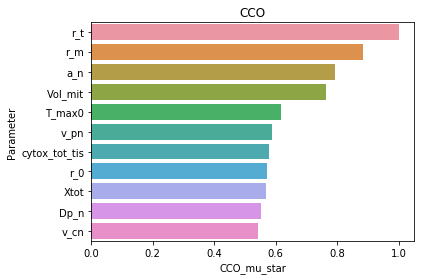

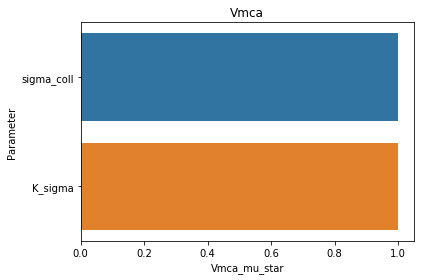

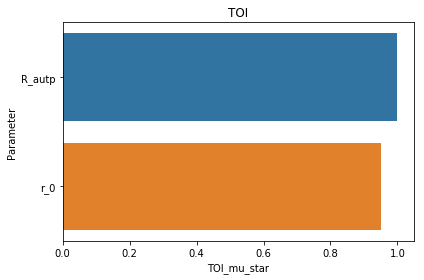

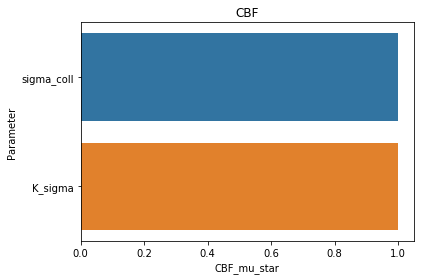

In [32]:
normed_dfs = {}
sens_params_NRMSE = []
for o in ["CCO", "Vmca", "TOI", "CBF"]:
    ax, df_norm, sens_p = sensitivity(df, o)
    normed_dfs[o]=df_norm
    sens_params_NRMSE.extend(list(sens_p))

## Impaired

In [33]:
df = pd.read_csv('wide_params/impaired/sensitivities.txt', sep='\t')

In [34]:
df.columns

Index(['Parameter', 'CCO_mu', 'CCO_mu_star', 'CCO_sigma', 'CCO_mu_star_conf',
       'TOI_mu', 'TOI_mu_star', 'TOI_sigma', 'TOI_mu_star_conf', 'CBF_mu',
       'CBF_mu_star', 'CBF_sigma', 'CBF_mu_star_conf', 'Vmca_mu',
       'Vmca_mu_star', 'Vmca_sigma', 'Vmca_mu_star_conf'],
      dtype='object')

In [35]:
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2']):    
    df = df.query("Parameter!='{}'".format(p))
df.shape

(121, 17)

In [36]:
def sensitivity(df, output):
    param = output+"_mu_star"
    min_max_scaler = preprocessing.MinMaxScaler()
    x = df[param].values.astype(float).reshape(-1, 1)
    #x = np.log(x+1)
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame({"Parameter": df["Parameter"].values, param: x_scaled.flatten()})
    df_norm = df_norm.sort_values(by=param, ascending=False)
    ax = sns.barplot(x=param, y="Parameter", data=df_norm[df_norm[param]>0.5])
    ax.set_title(output)
    plt.tight_layout()
    plt.savefig('Figures/wide_params/impaired/{}.png'.format(param))
    plt.show()
    plt.close()
    
    sensitive_parameters = df_norm[df_norm[param]>0.5]["Parameter"].values
    return ax, df_norm, sensitive_parameters

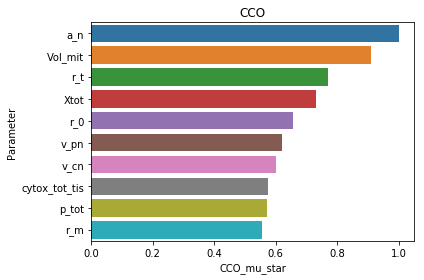

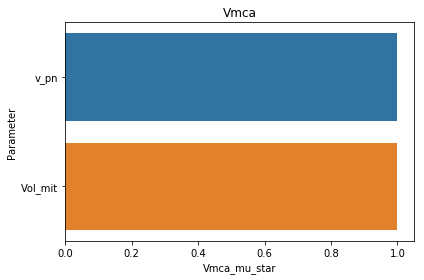

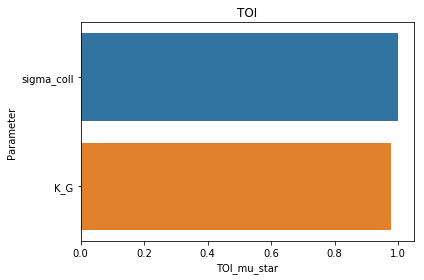

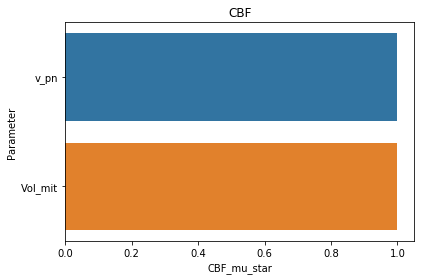

In [37]:
normed_dfs = {}
for o in ["CCO", "Vmca", "TOI", "CBF"]:
    ax, df_norm, sens_p = sensitivity(df, o)
    normed_dfs[o]=df_norm
    sens_params_NRMSE.extend(list(sens_p))

## Comparing NRMSE vs Euclidean

In [38]:
euc = set(list(sens_params_euclidean))

nrmse = set(list(sens_params_NRMSE))

print(euc)
print(nrmse)

{'r_t', 'a_n', 'p_tot', 'r_0', 'cytox_tot_tis', 'R_autc', 'v_on', 'Xtot', 'Dp_n', 'k_unc', 'v_cn', 'NADpool', 'phi', 'r_m', 'Vol_mit', 'v_pn', 'T_max0'}
{'r_t', 'R_autp', 'a_n', 'K_sigma', 'p_tot', 'r_0', 'cytox_tot_tis', 'Xtot', 'K_G', 'Dp_n', 'sigma_coll', 'v_cn', 'r_m', 'Vol_mit', 'v_pn', 'T_max0'}


In [39]:
euc.intersection(nrmse)

{'Dp_n',
 'T_max0',
 'Vol_mit',
 'Xtot',
 'a_n',
 'cytox_tot_tis',
 'p_tot',
 'r_0',
 'r_m',
 'r_t',
 'v_cn',
 'v_pn'}

In [40]:
print(euc.difference(nrmse))
print(nrmse.difference(euc))

{'R_autc', 'k_unc', 'NADpool', 'phi', 'v_on'}
{'R_autp', 'sigma_coll', 'K_sigma', 'K_G'}


In [41]:
print(list(nrmse))

['r_t', 'R_autp', 'a_n', 'K_sigma', 'p_tot', 'r_0', 'cytox_tot_tis', 'Xtot', 'K_G', 'Dp_n', 'sigma_coll', 'v_cn', 'r_m', 'Vol_mit', 'v_pn', 'T_max0']
